In [1]:
from PIL import Image, ImageDraw
import pandas as pd
import pyarrow as pa
from tqdm import tqdm, trange, tqdm_notebook
from time import sleep
from math import sqrt
import glob
import os
import re

In [30]:
from os import listdir
from os.path import isfile, join
mypath = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
mask-x1536-y1024

mask-x{tile_x}-y{tile_y}.png"

In [46]:
# Get the physical path to the PNG image containing the mask file
def get_mask_path(tile_x, tile_y):
    path = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\'
    path += f"masks\\mask-x{tile_x}-y{tile_y}.png"
    #path += f"./data/sentinel-2a-tile-{tile_x}x-{tile_y}y/masks/{mask_type}-mask.png"
    #path = f'E:\work\canecrushers\phase-01\data\sentinel-2a-tile-7680x-10240y\timeseries\'
    return path

mask_path = get_mask_path(TILE_X, TILE_Y)
print(mask_path)
# assert os.path.isfile(mask_path)


C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\masks\mask-x7680-y10240.png


In [47]:
def open_image(path, mode = None, cropbox = None, verbose = True):
    if verbose:
        print(path)
    img = Image.open(path)
    if cropbox is not None:
        img = img.crop(cropbox)
    if mode is not None:
        img = img.convert(mode)
    if verbose:
        print("Format: {0}\nSize: {1}\nMode: {2}".format(img.format, img.size, img.mode))
        (width, height) = img.size
        print('width:',width,'height:',height)
    return img

C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\masks\mask-x7680-y10240.png
Format: None
Size: (64, 64)
Mode: P
width: 64 height: 64


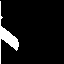

In [48]:
masp = open_image(mask_path, mode = 'P', cropbox = cropbox)
masp

In [49]:
TILE_X = 7680
TILE_Y = 10240

(start_x, start_y) = (0, 0)
(size_x, size_y) = (64, 64)

cropbox = (start_x, start_y, start_x + size_x, start_y + size_y)

In [50]:
def open_image(path, mode = None, cropbox = None, verbose = True):
    if verbose:
        print(path)
    img = Image.open(path)
    if cropbox is not None:
        img = img.crop(cropbox)
    if mode is not None:
        img = img.convert(mode)
    if verbose:
        print("Format: {0}\nSize: {1}\nMode: {2}".format(img.format, img.size, img.mode))
        (width, height) = img.size
        print('width:',width,'height:',height)
    return img

In [51]:
def get_timeseries_image_paths(tile_x, tile_y, band):
    path = 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\'
    path += f"sugarcanetiles\\{tile_x}-{tile_y}-{band}*.png"
    #print(path)
    images = glob.glob(path)
    return images

In [52]:
tci_list = get_timeseries_image_paths(TILE_X, TILE_Y, 'TCI')
tci_list[-1]

'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2019-08-09.png'

In [53]:
def last_date_in_path(path):
    return re.findall('\d{4}-\d{2}-\d{2}',path)[-1]

test_path = tci_list[-1]
print(test_path)
print(last_date_in_path(test_path))

C:\Users\kunal\Desktop\WORK\Datathon\Phase02-DataDelivery\sugarcanetiles\7680-10240-TCI-2019-08-09.png
2019-08-09


In [62]:
tci_list


['C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2016-12-22.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-01-01.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-01-11.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-02-10.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-02-20.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-03-02.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-03-12.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-TCI-2017-04-01.png',
 'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetile

In [54]:
def read_img_pixel_values(tile_x, tile_y, date, *args):
    """ return array of arrays 
        one array for each pixel (10m X 10 m), containing 
        an array for each spectrum value for the pixel
    """
    int_max = 2**15-1
    for img in (args):
        assert img.size == args[0].size
    (width, height) = args[0].size
    #print('width',width,'height',height)

    pixl_list = [img.load() for img in args]

    result_list = []
    for x in range(0, width):
        for y in range(0, height):
            val_list = [tile_x, tile_y, x, y, date]
            for pix in pixl_list:
                val = pix[x,y]
                if isinstance(val, tuple):
                    val_list.extend(val)
                else:
                    val_list.append(val)
            #print(val_list)
            result_list.append(val_list)
    return result_list

In [55]:
def write_to_excel(df, file_name, sheet_name='sheet1'):
    writer = pd.ExcelWriter(file_name, engine='xlsxwriter')
    df.to_excel(writer, sheet_name=sheet_name)
    writer.save()

In [56]:
columns = ['tile_x','tile_y', 'x','y', 'date', 'mask', 'red','green','blue', ]
columns.extend([f'B{b:02d}' for b in range(1,13)])
print(columns)

['tile_x', 'tile_y', 'x', 'y', 'date', 'mask', 'red', 'green', 'blue', 'B01', 'B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B09', 'B10', 'B11', 'B12']


In [57]:
b_name_list = [f'B{b:02d}' for b in range(1,13)]
b_path_lol = [get_timeseries_image_paths(TILE_X, TILE_Y, b) for b in b_name_list]
b_path_lol[-5][-1]

'C:\\Users\\kunal\\Desktop\\WORK\\Datathon\\Phase02-DataDelivery\\sugarcanetiles\\7680-10240-B08-2019-08-09.png'

In [58]:
def read_img_pixel_values(tile_x, tile_y, date, *args):
    """ return array of arrays 
        one array for each pixel (10m X 10 m), containing 
        an array for each spectrum value for the pixel
    """
    int_max = 2**15-1
    for img in (args):
        assert img.size == args[0].size
    (width, height) = args[0].size
    #print('width',width,'height',height)

    pixl_list = [img.load() for img in args]

    result_list = []
    for x in range(0, width):
        for y in range(0, height):
            val_list = [tile_x, tile_y, x, y, date]
            for pix in pixl_list:
                val = pix[x,y]
                if isinstance(val, tuple):
                    val_list.extend(val)
                else:
                    val_list.append(val)
            #print(val_list)
            result_list.append(val_list)
    return result_list

In [59]:
IterrateTiles = pd.DataFrame()
IterrateTiles['Unclean'] = onlyfiles
IterrateTiles['Unclean'].str.split('-',expand=True)
IterrateTiles['X Tile'] =  IterrateTiles['Unclean'].str.split('-',expand=True)[0]
IterrateTiles['Y Tile'] =  IterrateTiles['Unclean'].str.split('-',expand=True)[1]
IterrateTiles.head()

,Unclean,X Tile,Y Tile
0,1536-1024-B01-2016-12-22.png,1536,1024
1,1536-1024-B01-2017-01-01.png,1536,1024
2,1536-1024-B01-2017-01-11.png,1536,1024
3,1536-1024-B01-2017-02-10.png,1536,1024
4,1536-1024-B01-2017-02-20.png,1536,1024


In [60]:
#for tci_path, b_path_list in tqdm(list(zip(tci_list,b_path_lol))):
assert len(tci_list) == len(b_path_lol[0])
(tile_x, tile_y) = (TILE_X, TILE_Y)
for day_no in trange(0,1): # len(tci_list)):
    tci_path = tci_list[day_no]
    date = last_date_in_path(tci_path)
    b_path_list = [b_path_list[day_no] for b_path_list in b_path_lol]

    tci_img = open_image(tci_path, cropbox = cropbox, verbose=False)
    b_img_list = [open_image(b_path, cropbox = cropbox, verbose=False) for b_path in b_path_list]

    data = read_img_pixel_values(tile_x, tile_y, date, masp, tci_img, *b_img_list)

    df = pd.DataFrame(columns=columns, data=data)
    # apply a very very simple havested rules
    df['clouds'] = df.apply(lambda df : df.red == df.green and df.red == df.blue, axis=1)
    df['havested'] = df.apply(lambda df : df.red > df.green, axis=1)

    # Calculate Indices:
    # https://support.micasense.com/hc/en-us/articles/227837307-An-overview-of-the-available-layers-and-indices-in-Atlas
    # https://support.micasense.com/hc/en-us/articles/226531127-Creating-agricultural-indices-NDVI-NDRE-from-an-Atlas-GeoTIFF-in-QGIS-
    # https://earth.esa.int/web/sentinel/technical-guides/sentinel-2-msi/level-2a/algorithm
    # https://custom-scripts.sentinel-hub.com/custom-scripts/sentinel-2/indexdb/
    # NDVI ref: https://medium.com/analytics-vidhya/satellite-imagery-analysis-with-python-3f8ccf8a7c32

    # NDVI - Normalised Difference Vegetation Index (NDVI)
    #  = (NIR - RED) / (NIR + RED)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_361.js
    df['NDVI'] = df.apply(lambda df : int(10000 * (float(df.B08) - float(df.B04)) / (df.B08 + df.B04)) , axis=1)

    # GNDVI - Green Normalized Difference NDVI
    #  = (NIR - GREEN)/(NIR + GREEN)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gTm9ybWFsaXplZCBEaWZmZXJlbmNlIE5JUi9HcmVlbiBHcmVlbiBORFZJIChhYmJydi4gR05EVkkpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKE5JUi1HUkVFTikvKE5JUitHUkVFTikKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD00MDEKLy8KCmxldCBpbmRleCA9IChCMDggLSBCMDMpIC8gKEIwOCArIEIwMyk7CmxldCBtaW4gPSAtMC44OTsKbGV0IG1heCA9IDAuODk7CmxldCB6ZXJvID0gMC4wOwoKLy8gY29sb3JCbGVuZCB3aWxsIHJldHVybiBhIGNvbG9yIHdoZW4gdGhlIGluZGV4IGlzIGJldHdlZW4gbWluIGFuZCBtYXggYW5kIHdoaXRlIHdoZW4gaXQgaXMgbGVzcyB0aGFuIG1pbi4KLy8gVG8gc2VlIGJsYWNrIHdoZW4gaXQgaXMgbW9yZSB0aGFuIG1heCwgdW5jb21tZW50IHRoZSBsYXN0IGxpbmUgb2YgY29sb3JCbGVuZC4KLy8gVGhlIG1pbi9tYXggdmFsdWVzIHdlcmUgY29tcHV0ZWQgYXV0b21hdGljYWxseSBhbmQgbWF5IGJlIHBvb3JseSBzcGVjaWZpZWQsIGZlZWwgZnJlZSB0byBjaGFuZ2UgdGhlbSB0byB0d2VhayB0aGUgZGlzcGxheWVkIHJhbmdlLgovLyBUaGlzIGluZGV4IGNyb3NzZXMgemVybywgc28gYSBkaXZlcmdpbmcgY29sb3IgbWFwIGlzIHVzZWQuIFRvIHR3ZWFrIHRoZSB2YWx1ZSBvZiB0aGUgYnJlYWsgaW4gdGhlIGNvbG9yIG1hcCwgY2hhbmdlIHRoZSB2YXJpYWJsZSAnemVybycuCgpsZXQgdW5kZXJmbG93X2NvbG9yID0gWzEsIDEsIDFdOwpsZXQgbG93X2NvbG9yID0gWzIwOC8yNTUsIDg4LzI1NSwgMTI2LzI1NV07CmxldCBoaWdoX2NvbG9yID0gWzI0MS8yNTUsIDIzNC8yNTUsIDIwMC8yNTVdOwpsZXQgemVyb19jb2xvciA9IFswLCAxNDcvMjU1LCAxNDYvMjU1XTsKbGV0IG92ZXJmbG93X2NvbG9yID0gWzAsIDAsIDBdOwoKcmV0dXJuIGNvbG9yQmxlbmQoaW5kZXgsIFttaW4sIG1pbiwgemVybywgbWF4XSwKWwoJdW5kZXJmbG93X2NvbG9yLAoJbG93X2NvbG9yLAoJemVyb19jb2xvciwgLy8gZGl2ZXJnZW50IHN0ZXAgYXQgemVybwoJaGlnaF9jb2xvciwKCS8vb3ZlcmZsb3dfY29sb3IgLy8gdW5jb21tZW50IHRvIHNlZSBvdmVyZmxvd3MKXSk7DQo%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_401.js
    df['GNDVI'] = df.apply(lambda df : int(10000 * (float(df.B08) - float(df.B03)) / (df.B08 + df.B03)) , axis=1)

    # RDVI - Normalised Difference Vegetation Index (NDVI)
    #  = 2*(NIR - RED) / sqrt(NIR + RED)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gUmVub3JtYWxpemVkIERpZmZlcmVuY2UgVmVnZXRhdGlvbiBJbmRleCAgIChhYmJydi4gUkRWSSkKLy8KLy8gR2VuZXJhbCBmb3JtdWxhOiAoODAwbm0gLSA2NzBubSkgL3NxcnQoODAwbm0gKyA2NzBubSkwLjUKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD03NgovLwoKbGV0IGluZGV4ID0gKEIwOCAtIEIwNCkgLyBNYXRoLnNxcnQoQjA4ICsgQjA0KSAqIDAuNTsKbGV0IG1pbiA9IC0wLjI2NjsKbGV0IG1heCA9IDAuMjY2OwpsZXQgemVybyA9IDAuMDsKCi8vIGNvbG9yQmxlbmQgd2lsbCByZXR1cm4gYSBjb2xvciB3aGVuIHRoZSBpbmRleCBpcyBiZXR3ZWVuIG1pbiBhbmQgbWF4IGFuZCB3aGl0ZSB3aGVuIGl0IGlzIGxlc3MgdGhhbiBtaW4uCi8vIFRvIHNlZSBibGFjayB3aGVuIGl0IGlzIG1vcmUgdGhhbiBtYXgsIHVuY29tbWVudCB0aGUgbGFzdCBsaW5lIG9mIGNvbG9yQmxlbmQuCi8vIFRoZSBtaW4vbWF4IHZhbHVlcyB3ZXJlIGNvbXB1dGVkIGF1dG9tYXRpY2FsbHkgYW5kIG1heSBiZSBwb29ybHkgc3BlY2lmaWVkLCBmZWVsIGZyZWUgdG8gY2hhbmdlIHRoZW0gdG8gdHdlYWsgdGhlIGRpc3BsYXllZCByYW5nZS4KLy8gVGhpcyBpbmRleCBjcm9zc2VzIHplcm8sIHNvIGEgZGl2ZXJnaW5nIGNvbG9yIG1hcCBpcyB1c2VkLiBUbyB0d2VhayB0aGUgdmFsdWUgb2YgdGhlIGJyZWFrIGluIHRoZSBjb2xvciBtYXAsIGNoYW5nZSB0aGUgdmFyaWFibGUgJ3plcm8nLgoKbGV0IHVuZGVyZmxvd19jb2xvciA9IFsxLCAxLCAxXTsKbGV0IGxvd19jb2xvciA9IFsyMDgvMjU1LCA4OC8yNTUsIDEyNi8yNTVdOwpsZXQgaGlnaF9jb2xvciA9IFsyNDEvMjU1LCAyMzQvMjU1LCAyMDAvMjU1XTsKbGV0IHplcm9fY29sb3IgPSBbMCwgMTQ3LzI1NSwgMTQ2LzI1NV07CmxldCBvdmVyZmxvd19jb2xvciA9IFswLCAwLCAwXTsKCnJldHVybiBjb2xvckJsZW5kKGluZGV4LCBbbWluLCBtaW4sIHplcm8sIG1heF0sClsKCXVuZGVyZmxvd19jb2xvciwKCWxvd19jb2xvciwKCXplcm9fY29sb3IsIC8vIGRpdmVyZ2VudCBzdGVwIGF0IHplcm8KCWhpZ2hfY29sb3IsCgkvL292ZXJmbG93X2NvbG9yIC8vIHVuY29tbWVudCB0byBzZWUgb3ZlcmZsb3dzCl0pOw0K&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_76.js
    df['RDVI'] = df.apply(lambda df : int(10000 * 2 * (float(df.B08) - float(df.B04)) / sqrt(df.B08 + df.B04)) , axis=1)

    # RBNDVI - Red Blue Normalised Difference Vegetation Index (NDVI)
    #  = (NIR - RED -BLUE) / (NIR + RED + BLUE)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gUmVkLUJsdWUgTkRWSSAgKGFiYnJ2LiBSQk5EVkkpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKE5JUi0oUkVEK0JMVUUpKS8oTklSKyhSRUQrQkxVRSkpCi8vCi8vIFVSTCBodHRwczovL3d3dy5pbmRleGRhdGFiYXNlLmRlL2RiL3NpLXNpbmdsZS5waHA%2Fc2Vuc29yX2lkPTk2JnJzaW5kZXhfaWQ9MTg3Ci8vCgpsZXQgaW5kZXggPSAoQjA4IC0gKEIwNCArIEIwMikpIC8gKEIwOCArIChCMDQgKyBCMDIpKTsKbGV0IG1pbiA9IC0wLjkzOTsKbGV0IG1heCA9IDAuNTI5OwpsZXQgemVybyA9IDAuMDsKCi8vIGNvbG9yQmxlbmQgd2lsbCByZXR1cm4gYSBjb2xvciB3aGVuIHRoZSBpbmRleCBpcyBiZXR3ZWVuIG1pbiBhbmQgbWF4IGFuZCB3aGl0ZSB3aGVuIGl0IGlzIGxlc3MgdGhhbiBtaW4uCi8vIFRvIHNlZSBibGFjayB3aGVuIGl0IGlzIG1vcmUgdGhhbiBtYXgsIHVuY29tbWVudCB0aGUgbGFzdCBsaW5lIG9mIGNvbG9yQmxlbmQuCi8vIFRoZSBtaW4vbWF4IHZhbHVlcyB3ZXJlIGNvbXB1dGVkIGF1dG9tYXRpY2FsbHkgYW5kIG1heSBiZSBwb29ybHkgc3BlY2lmaWVkLCBmZWVsIGZyZWUgdG8gY2hhbmdlIHRoZW0gdG8gdHdlYWsgdGhlIGRpc3BsYXllZCByYW5nZS4KLy8gVGhpcyBpbmRleCBjcm9zc2VzIHplcm8sIHNvIGEgZGl2ZXJnaW5nIGNvbG9yIG1hcCBpcyB1c2VkLiBUbyB0d2VhayB0aGUgdmFsdWUgb2YgdGhlIGJyZWFrIGluIHRoZSBjb2xvciBtYXAsIGNoYW5nZSB0aGUgdmFyaWFibGUgJ3plcm8nLgoKbGV0IHVuZGVyZmxvd19jb2xvciA9IFsxLCAxLCAxXTsKbGV0IGxvd19jb2xvciA9IFsyMDgvMjU1LCA4OC8yNTUsIDEyNi8yNTVdOwpsZXQgaGlnaF9jb2xvciA9IFsyNDEvMjU1LCAyMzQvMjU1LCAyMDAvMjU1XTsKbGV0IHplcm9fY29sb3IgPSBbMCwgMTQ3LzI1NSwgMTQ2LzI1NV07CmxldCBvdmVyZmxvd19jb2xvciA9IFswLCAwLCAwXTsKCnJldHVybiBjb2xvckJsZW5kKGluZGV4LCBbbWluLCBtaW4sIHplcm8sIG1heF0sClsKCXVuZGVyZmxvd19jb2xvciwKCWxvd19jb2xvciwKCXplcm9fY29sb3IsIC8vIGRpdmVyZ2VudCBzdGVwIGF0IHplcm8KCWhpZ2hfY29sb3IsCgkvL292ZXJmbG93X2NvbG9yIC8vIHVuY29tbWVudCB0byBzZWUgb3ZlcmZsb3dzCl0pOw0K&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_187.js
    df['RBNDVI'] = df.apply(lambda df : int(10000 * (2*float(df.B08) - float(df.B04) - float(df.B02)) / (2*df.B08 + df.B04 + df.B02)) , axis=1)

    # LCI - Leaf Chlorophyll Index
    #  = (NIR - REDE)/(NIR + REDE)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gTGVhZiBDaGxvcm9waHlsbCBJbmRleCAgKGFiYnJ2LiBMQ0kpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKFs4NTBdLVs3MTBdKS8oWzg1MF0rWzY4MF0pCi8vCi8vIFVSTCBodHRwczovL3d3dy5pbmRleGRhdGFiYXNlLmRlL2RiL3NpLXNpbmdsZS5waHA%2Fc2Vuc29yX2lkPTk2JnJzaW5kZXhfaWQ9MTA5Ci8vCgpsZXQgaW5kZXggPSAoQjA4IC0gQjA1KSAvIChCMDggKyBCMDQpOwpsZXQgbWluID0gLTIuNzk4OwpsZXQgbWF4ID0gMC43MzU7CmxldCB6ZXJvID0gMC4wOwoKLy8gY29sb3JCbGVuZCB3aWxsIHJldHVybiBhIGNvbG9yIHdoZW4gdGhlIGluZGV4IGlzIGJldHdlZW4gbWluIGFuZCBtYXggYW5kIHdoaXRlIHdoZW4gaXQgaXMgbGVzcyB0aGFuIG1pbi4KLy8gVG8gc2VlIGJsYWNrIHdoZW4gaXQgaXMgbW9yZSB0aGFuIG1heCwgdW5jb21tZW50IHRoZSBsYXN0IGxpbmUgb2YgY29sb3JCbGVuZC4KLy8gVGhlIG1pbi9tYXggdmFsdWVzIHdlcmUgY29tcHV0ZWQgYXV0b21hdGljYWxseSBhbmQgbWF5IGJlIHBvb3JseSBzcGVjaWZpZWQsIGZlZWwgZnJlZSB0byBjaGFuZ2UgdGhlbSB0byB0d2VhayB0aGUgZGlzcGxheWVkIHJhbmdlLgovLyBUaGlzIGluZGV4IGNyb3NzZXMgemVybywgc28gYSBkaXZlcmdpbmcgY29sb3IgbWFwIGlzIHVzZWQuIFRvIHR3ZWFrIHRoZSB2YWx1ZSBvZiB0aGUgYnJlYWsgaW4gdGhlIGNvbG9yIG1hcCwgY2hhbmdlIHRoZSB2YXJpYWJsZSAnemVybycuCgpsZXQgdW5kZXJmbG93X2NvbG9yID0gWzEsIDEsIDFdOwpsZXQgbG93X2NvbG9yID0gWzIwOC8yNTUsIDg4LzI1NSwgMTI2LzI1NV07CmxldCBoaWdoX2NvbG9yID0gWzI0MS8yNTUsIDIzNC8yNTUsIDIwMC8yNTVdOwpsZXQgemVyb19jb2xvciA9IFswLCAxNDcvMjU1LCAxNDYvMjU1XTsKbGV0IG92ZXJmbG93X2NvbG9yID0gWzAsIDAsIDBdOwoKcmV0dXJuIGNvbG9yQmxlbmQoaW5kZXgsIFttaW4sIG1pbiwgemVybywgbWF4XSwKWwoJdW5kZXJmbG93X2NvbG9yLAoJbG93X2NvbG9yLAoJemVyb19jb2xvciwgLy8gZGl2ZXJnZW50IHN0ZXAgYXQgemVybwoJaGlnaF9jb2xvciwKCS8vb3ZlcmZsb3dfY29sb3IgLy8gdW5jb21tZW50IHRvIHNlZSBvdmVyZmxvd3MKXSk7DQo%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_109.js
    df['LCI'] = df.apply(lambda df : int(100 * (float(df.B08) - float(df.B05)) / (df.B08 + df.B05)) , axis=1)

    # LAI - Leaf Area Index
    #  = (REDE - RED)/(REDE + RED)
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3231680/
    df['LAI'] = df.apply(lambda df : int(10000 * (float(df.B05) - float(df.B04)) / (df.B05 + df.B04)) , axis=1)

    # SCI - Soil Composition Index
    #  = (SWIR - NIR)/(SWIR + NIR)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gU29pbCBDb21wb3NpdGlvbiBJbmRleCAgKGFiYnJ2LiApCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKFsxNjAwOjE3MDBdLVs3NjA6ODYwXSkvKFsxNjAwOjE3MDBdK1s3NjA6ODYwXSkKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD04OAovLwoKbGV0IGluZGV4ID0gKEIxMSAtIEIwOCkgLyAoQjExICsgQjA4KTsKbGV0IG1pbiA9IC0wLjg5OwpsZXQgbWF4ID0gMC44OTsKbGV0IHplcm8gPSAwLjA7CgovLyBjb2xvckJsZW5kIHdpbGwgcmV0dXJuIGEgY29sb3Igd2hlbiB0aGUgaW5kZXggaXMgYmV0d2VlbiBtaW4gYW5kIG1heCBhbmQgd2hpdGUgd2hlbiBpdCBpcyBsZXNzIHRoYW4gbWluLgovLyBUbyBzZWUgYmxhY2sgd2hlbiBpdCBpcyBtb3JlIHRoYW4gbWF4LCB1bmNvbW1lbnQgdGhlIGxhc3QgbGluZSBvZiBjb2xvckJsZW5kLgovLyBUaGUgbWluL21heCB2YWx1ZXMgd2VyZSBjb21wdXRlZCBhdXRvbWF0aWNhbGx5IGFuZCBtYXkgYmUgcG9vcmx5IHNwZWNpZmllZCwgZmVlbCBmcmVlIHRvIGNoYW5nZSB0aGVtIHRvIHR3ZWFrIHRoZSBkaXNwbGF5ZWQgcmFuZ2UuCi8vIFRoaXMgaW5kZXggY3Jvc3NlcyB6ZXJvLCBzbyBhIGRpdmVyZ2luZyBjb2xvciBtYXAgaXMgdXNlZC4gVG8gdHdlYWsgdGhlIHZhbHVlIG9mIHRoZSBicmVhayBpbiB0aGUgY29sb3IgbWFwLCBjaGFuZ2UgdGhlIHZhcmlhYmxlICd6ZXJvJy4KCmxldCB1bmRlcmZsb3dfY29sb3IgPSBbMSwgMSwgMV07CmxldCBsb3dfY29sb3IgPSBbMjA4LzI1NSwgODgvMjU1LCAxMjYvMjU1XTsKbGV0IGhpZ2hfY29sb3IgPSBbMjQxLzI1NSwgMjM0LzI1NSwgMjAwLzI1NV07CmxldCB6ZXJvX2NvbG9yID0gWzAsIDE0Ny8yNTUsIDE0Ni8yNTVdOwpsZXQgb3ZlcmZsb3dfY29sb3IgPSBbMCwgMCwgMF07CgpyZXR1cm4gY29sb3JCbGVuZChpbmRleCwgW21pbiwgbWluLCB6ZXJvLCBtYXhdLApbCgl1bmRlcmZsb3dfY29sb3IsCglsb3dfY29sb3IsCgl6ZXJvX2NvbG9yLCAvLyBkaXZlcmdlbnQgc3RlcCBhdCB6ZXJvCgloaWdoX2NvbG9yLAoJLy9vdmVyZmxvd19jb2xvciAvLyB1bmNvbW1lbnQgdG8gc2VlIG92ZXJmbG93cwpdKTsNCg%3D%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_88.js
    df['SCI'] = df.apply(lambda df : int(10000 * (float(df.B11) - float(df.B08)) / (df.B11 + df.B08)) , axis=1)

    # SCI - Soil Composition Index
    #  = (SWIR - NIR)/(SWIR + NIR)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gU29pbCBDb21wb3NpdGlvbiBJbmRleCAgKGFiYnJ2LiApCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKFsxNjAwOjE3MDBdLVs3NjA6ODYwXSkvKFsxNjAwOjE3MDBdK1s3NjA6ODYwXSkKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD04OAovLwoKbGV0IGluZGV4ID0gKEIxMSAtIEIwOCkgLyAoQjExICsgQjA4KTsKbGV0IG1pbiA9IC0wLjg5OwpsZXQgbWF4ID0gMC44OTsKbGV0IHplcm8gPSAwLjA7CgovLyBjb2xvckJsZW5kIHdpbGwgcmV0dXJuIGEgY29sb3Igd2hlbiB0aGUgaW5kZXggaXMgYmV0d2VlbiBtaW4gYW5kIG1heCBhbmQgd2hpdGUgd2hlbiBpdCBpcyBsZXNzIHRoYW4gbWluLgovLyBUbyBzZWUgYmxhY2sgd2hlbiBpdCBpcyBtb3JlIHRoYW4gbWF4LCB1bmNvbW1lbnQgdGhlIGxhc3QgbGluZSBvZiBjb2xvckJsZW5kLgovLyBUaGUgbWluL21heCB2YWx1ZXMgd2VyZSBjb21wdXRlZCBhdXRvbWF0aWNhbGx5IGFuZCBtYXkgYmUgcG9vcmx5IHNwZWNpZmllZCwgZmVlbCBmcmVlIHRvIGNoYW5nZSB0aGVtIHRvIHR3ZWFrIHRoZSBkaXNwbGF5ZWQgcmFuZ2UuCi8vIFRoaXMgaW5kZXggY3Jvc3NlcyB6ZXJvLCBzbyBhIGRpdmVyZ2luZyBjb2xvciBtYXAgaXMgdXNlZC4gVG8gdHdlYWsgdGhlIHZhbHVlIG9mIHRoZSBicmVhayBpbiB0aGUgY29sb3IgbWFwLCBjaGFuZ2UgdGhlIHZhcmlhYmxlICd6ZXJvJy4KCmxldCB1bmRlcmZsb3dfY29sb3IgPSBbMSwgMSwgMV07CmxldCBsb3dfY29sb3IgPSBbMjA4LzI1NSwgODgvMjU1LCAxMjYvMjU1XTsKbGV0IGhpZ2hfY29sb3IgPSBbMjQxLzI1NSwgMjM0LzI1NSwgMjAwLzI1NV07CmxldCB6ZXJvX2NvbG9yID0gWzAsIDE0Ny8yNTUsIDE0Ni8yNTVdOwpsZXQgb3ZlcmZsb3dfY29sb3IgPSBbMCwgMCwgMF07CgpyZXR1cm4gY29sb3JCbGVuZChpbmRleCwgW21pbiwgbWluLCB6ZXJvLCBtYXhdLApbCgl1bmRlcmZsb3dfY29sb3IsCglsb3dfY29sb3IsCgl6ZXJvX2NvbG9yLCAvLyBkaXZlcmdlbnQgc3RlcCBhdCB6ZXJvCgloaWdoX2NvbG9yLAoJLy9vdmVyZmxvd19jb2xvciAvLyB1bmNvbW1lbnQgdG8gc2VlIG92ZXJmbG93cwpdKTsNCg%3D%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_88.js
    df['SCI'] = df.apply(lambda df : int(10000 * (float(df.B11) - float(df.B08)) / (df.B11 + df.B08)) , axis=1)

    # NDMI - Normalized Difference Moisture Index
    #  = (NIR - SWIR)/(SWIR + NIR)
    # https://apps.sentinel-hub.com/sentinel-playground/?source=S2&lat=-20.83757591134921&lng=148.7277603149414&zoom=15&preset=CUSTOM&layers=B01,B02,B03&maxcc=20&gain=1.0&gamma=1.0&time=2019-03-01%7C2019-09-19&atmFilter=&showDates=false&evalscript=Ly8KLy8gTm9ybWFsaXplZCBEaWZmZXJlbmNlIDgyMC8xNjAwIE5vcm1hbGl6ZWQgRGlmZmVyZW5jZSBNb2lzdHVyZSBJbmRleCAoYWJicnYuIE5ETUkpCi8vCi8vIEdlbmVyYWwgZm9ybXVsYTogKDgyMG5tIC0gMTYwMG5tKSAvICg4MjBubSArIDE2MDBubSkKLy8KLy8gVVJMIGh0dHBzOi8vd3d3LmluZGV4ZGF0YWJhc2UuZGUvZGIvc2ktc2luZ2xlLnBocD9zZW5zb3JfaWQ9OTYmcnNpbmRleF9pZD01NgovLwoKbGV0IGluZGV4ID0gKEIwOCAtIEIxMSkgLyAoQjA4ICsgQjExKTsKbGV0IG1pbiA9IC0wLjg5OwpsZXQgbWF4ID0gMC44OTsKbGV0IHplcm8gPSAwLjA7CgovLyBjb2xvckJsZW5kIHdpbGwgcmV0dXJuIGEgY29sb3Igd2hlbiB0aGUgaW5kZXggaXMgYmV0d2VlbiBtaW4gYW5kIG1heCBhbmQgd2hpdGUgd2hlbiBpdCBpcyBsZXNzIHRoYW4gbWluLgovLyBUbyBzZWUgYmxhY2sgd2hlbiBpdCBpcyBtb3JlIHRoYW4gbWF4LCB1bmNvbW1lbnQgdGhlIGxhc3QgbGluZSBvZiBjb2xvckJsZW5kLgovLyBUaGUgbWluL21heCB2YWx1ZXMgd2VyZSBjb21wdXRlZCBhdXRvbWF0aWNhbGx5IGFuZCBtYXkgYmUgcG9vcmx5IHNwZWNpZmllZCwgZmVlbCBmcmVlIHRvIGNoYW5nZSB0aGVtIHRvIHR3ZWFrIHRoZSBkaXNwbGF5ZWQgcmFuZ2UuCi8vIFRoaXMgaW5kZXggY3Jvc3NlcyB6ZXJvLCBzbyBhIGRpdmVyZ2luZyBjb2xvciBtYXAgaXMgdXNlZC4gVG8gdHdlYWsgdGhlIHZhbHVlIG9mIHRoZSBicmVhayBpbiB0aGUgY29sb3IgbWFwLCBjaGFuZ2UgdGhlIHZhcmlhYmxlICd6ZXJvJy4KCmxldCB1bmRlcmZsb3dfY29sb3IgPSBbMSwgMSwgMV07CmxldCBsb3dfY29sb3IgPSBbMjA4LzI1NSwgODgvMjU1LCAxMjYvMjU1XTsKbGV0IGhpZ2hfY29sb3IgPSBbMjQxLzI1NSwgMjM0LzI1NSwgMjAwLzI1NV07CmxldCB6ZXJvX2NvbG9yID0gWzAsIDE0Ny8yNTUsIDE0Ni8yNTVdOwpsZXQgb3ZlcmZsb3dfY29sb3IgPSBbMCwgMCwgMF07CgpyZXR1cm4gY29sb3JCbGVuZChpbmRleCwgW21pbiwgbWluLCB6ZXJvLCBtYXhdLApbCgl1bmRlcmZsb3dfY29sb3IsCglsb3dfY29sb3IsCgl6ZXJvX2NvbG9yLCAvLyBkaXZlcmdlbnQgc3RlcCBhdCB6ZXJvCgloaWdoX2NvbG9yLAoJLy9vdmVyZmxvd19jb2xvciAvLyB1bmNvbW1lbnQgdG8gc2VlIG92ZXJmbG93cwpdKTsNCg%3D%3D&evalscripturl=https://raw.githubusercontent.com/sentinel-hub/custom-scripts/master/sentinel-2/indexdb/id_56.js
    df['NDMI'] = df.apply(lambda df : int(10000 * (float(df.B08) - float(df.B11)) / (df.B11 + df.B08)) , axis=1)
    
    # GLI - Green Leaf Index
    #  = (2*GREEN - RED - BLUE)/(2*GREEN + RED + BLUE)
    # https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3231680/
    df['GLI'] = df.apply(lambda df : int(10000 * (float(df.B05) - float(df.B04)) / (df.B05 + df.B04)) , axis=1)

    df.to_parquet(f'image_values_{tile_x}_{tile_y}_{date}.snappy.parquet')

100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:02<00:00,  2.35s/it]


In [61]:
df

,tile_x,tile_y,x,y,date,mask,red,green,blue,B01,...,havested,NDVI,GNDVI,RDVI,RBNDVI,LCI,LAI,SCI,NDMI,GLI
0,7680,10240,0,0,2016-12-22,0,100,104,111,3430,...,False,2783,2605,487194,2536,22,556,60,-60,556
1,7680,10240,0,1,2016-12-22,1,103,108,113,3430,...,False,2694,2467,476218,2461,23,400,0,0,400
2,7680,10240,0,2,2016-12-22,1,103,108,113,3526,...,False,2788,2571,495551,2563,23,512,213,-213,512
3,7680,10240,0,3,2016-12-22,1,104,110,114,3526,...,False,2879,2630,518474,2672,24,446,47,-47,446
4,7680,10240,0,4,2016-12-22,1,104,111,115,3526,...,False,3001,2698,543941,2764,24,574,109,-109,574
5,7680,10240,0,5,2016-12-22,3,103,111,113,3526,...,False,3030,2661,548034,2798,24,612,116,-116,612
6,7680,10240,0,6,2016-12-22,3,100,110,112,3526,...,False,3092,2629,553852,2828,24,710,127,-127,710
7,7680,10240,0,7,2016-12-22,1,99,110,111,3526,...,False,3099,2624,553826,2834,24,739,148,-148,739
8,7680,10240,0,8,2016-12-22,3,101,111,112,3544,...,False,3054,2633,549604,2823,23,716,218,-218,716
9,7680,10240,0,9,2016-12-22,3,103,113,116,3544,...,False,3123,2733,570649,2846,25,615,40,-40,615
